In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.max_columns',500)
import seaborn as sns

In [2]:
path = '..\\data_set\\datos_musica.csv'

In [30]:
df = pd.read_csv(path, encoding='utf8')

In [31]:
df.head()

,Unnamed: 0,archivo,fft2,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,auto_c,genero
0,0,01-TheMountain_02m_00s__03m_00s.mp3,(2.6691690436564386e-05-2.2355395685735857e-06j),6,0.06,2358.978044,2552.823890,4793.526802,0.470420,-163.372833,165.717529,-50.697205,13.083968,-0.032861,16.523687,-10.634155,13.878497,-0.156555,4.318977,1.155136,3.123753,3.154028,3.419914,1.201207,-3.672799,1.497480,0.186496,0.511725,-5.180268,123.046875,0.772140,prog
1,1,01ANightmareToRemember_02m_00s__03m_00s.mp3,(-0.00011190251825610176-2.7460282581159845e-06j),4,0.04,3100.689109,3256.578868,6469.363992,0.596201,-48.062439,135.743393,-53.932007,63.562389,-6.626508,33.995968,-5.462245,21.089064,0.379193,13.363898,-0.915789,8.659492,1.639240,5.244628,1.330808,-2.682353,0.532447,-1.862646,1.804187,-5.636509,109.956782,0.628546,prog
2,2,01AcidRain_02m_00s__03m_00s.mp3,(-1.0740729521785397e-05+3.604947664825886e-07j),5,0.05,3198.378355,3543.702522,6808.570540,0.546079,-58.244419,134.549545,-35.384872,52.873055,-5.400178,27.031818,-12.117587,20.233650,-8.962458,10.447237,-4.707659,7.385719,-0.928300,4.593798,1.471745,0.739590,0.728077,-4.671610,3.458641,-1.755218,143.554688,0.541958,prog
3,3,01BalrogBoogie_02m_00s__03m_00s.mp3,(1.4924606148269959e-05+1.0660151161800968e-07j),2,0.02,2942.011868,3163.903990,6050.917527,0.433330,-91.082634,134.391296,-46.598930,44.523190,-2.545116,30.069979,-9.316360,17.695271,-0.801928,9.089577,-1.713330,8.924645,4.266488,2.395693,1.147897,1.289821,-0.101062,-4.962541,3.051191,-2.858684,90.666118,0.541528,prog
4,4,01C'estlaVie_02m_00s__03m_00s.mp3,(-5.486244481289759e-05+2.7371602300263476e-06j),5,0.05,3123.743239,3337.527859,6499.844646,0.535730,-34.448353,137.779984,-48.767544,63.001434,-11.798602,31.900543,-13.216450,19.975677,-6.714272,13.966826,0.649572,8.866032,1.035663,3.280222,3.242964,-4.131340,1.912559,-6.067165,2.728408,-6.114751,120.185320,0.746078,prog


In [32]:
df.shape

(390, 32)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         390 non-null    int64  
 1   archivo            390 non-null    object 
 2   fft2               390 non-null    object 
 3   zero_cr            390 non-null    int64  
 4   zero_crossings_m   390 non-null    float64
 5   spectral_centroid  390 non-null    float64
 6   spectral_bw        390 non-null    float64
 7   spectral_rf        390 non-null    float64
 8   croma              390 non-null    float64
 9   mfcc_1             390 non-null    float64
 10  mfcc_2             390 non-null    float64
 11  mfcc_3             390 non-null    float64
 12  mfcc_4             390 non-null    float64
 13  mfcc_5             390 non-null    float64
 14  mfcc_6             390 non-null    float64
 15  mfcc_7             390 non-null    float64
 16  mfcc_8             390 non

In [34]:
df.isnull().any().any()

False

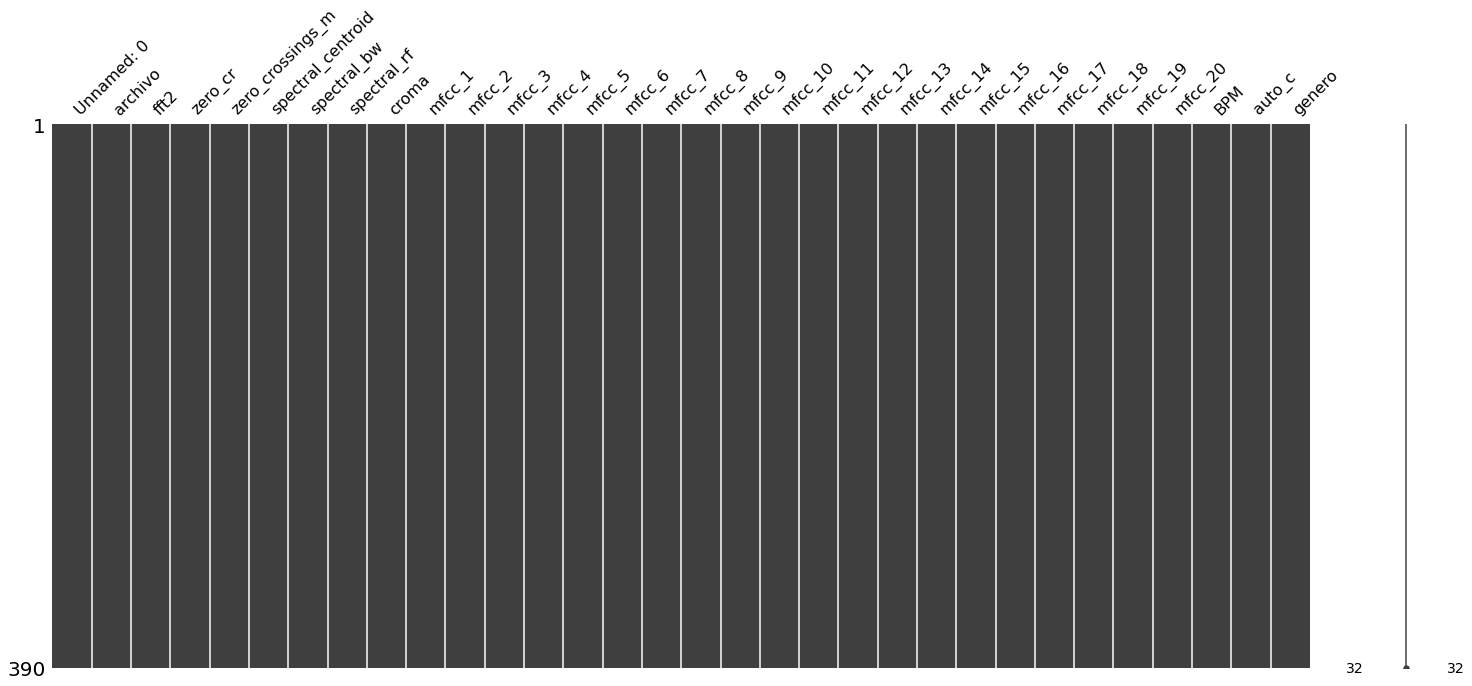

In [35]:
msno.matrix(df)

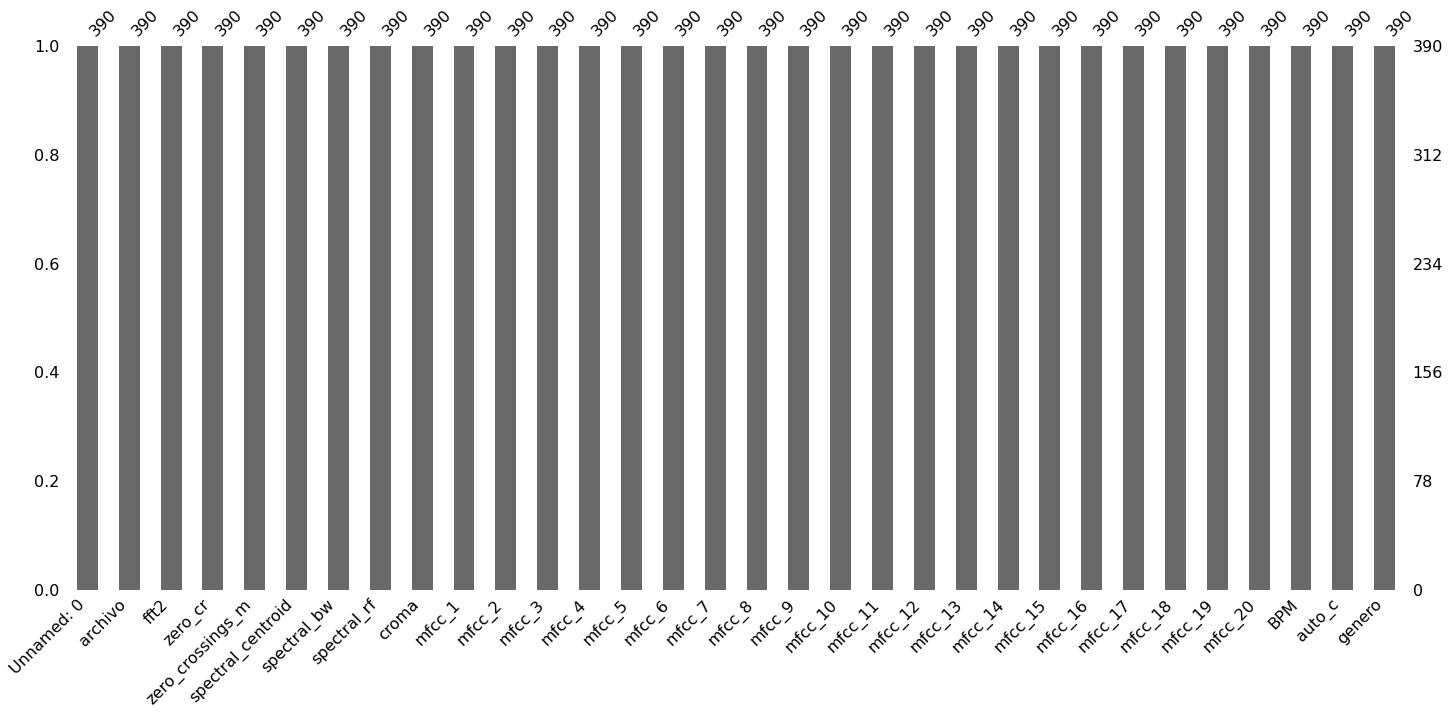

In [36]:
msno.bar(df)

In [37]:
#
df.groupby('genero').mean()

,Unnamed: 0,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,auto_c
genero,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
electronica,324.5,7.715385,0.077154,3664.769823,3719.675979,7857.998810,0.532508,-65.689816,116.190062,-37.717804,45.229312,-21.328018,31.227044,-13.062522,19.865181,-6.606800,11.919786,-2.089726,6.901863,2.001522,2.897985,3.759977,-0.840888,4.367829,-2.061035,5.707278,-2.616686,127.834031,0.534869
prog,64.5,4.892308,0.048923,2633.703679,2944.731812,5422.004875,0.520611,-121.510305,147.896507,-41.057114,46.850062,0.305706,26.756867,-6.182665,15.559259,-1.505437,9.135088,0.658689,4.925011,1.455034,1.789769,1.790361,-1.988850,-0.077769,-2.959955,1.395956,-4.444564,123.038354,0.622049
salsa,194.5,7.492308,0.074923,2866.901424,3039.036636,5855.439288,0.419100,-204.440593,140.781212,-40.942452,49.471140,-11.883951,22.663284,-11.767072,11.368040,-3.840248,1.848151,-1.951899,3.850634,-0.208070,-2.329010,2.166250,-3.473790,0.526125,-3.216435,1.328346,-5.358968,116.143151,0.468924


In [38]:
df.groupby('genero').sum()

,Unnamed: 0,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,auto_c
genero,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
electronica,42185,1003,10.03,476420.077002,483557.877316,1.021540e+06,69.226015,-8539.676029,15104.708008,-4903.314475,5879.810562,-2772.642282,4059.515716,-1698.127823,2582.473482,-858.883970,1549.572210,-271.664337,897.242153,260.197850,376.738034,488.797064,-109.315454,567.817754,-267.934497,741.946143,-340.169169,16618.423967,69.532967
prog,8385,636,6.36,342381.478319,382815.135509,7.048606e+05,67.679463,-15796.339670,19226.545853,-5337.424873,6090.508018,39.741717,3478.392697,-803.746386,2022.703622,-195.706831,1187.561436,85.629542,640.251488,189.154370,232.669944,232.746934,-258.550532,-10.109989,-384.794204,181.474286,-577.793285,15994.986051,80.866411
salsa,25285,974,9.74,372697.185132,395074.762703,7.612071e+05,54.482959,-26577.277153,18301.557556,-5322.518778,6431.248230,-1544.913652,2946.226930,-1529.719407,1477.845212,-499.232271,240.259645,-253.746898,500.582481,-27.049123,-302.771240,281.612480,-451.592696,68.396310,-418.136518,172.684979,-696.665796,15098.609660,60.960163


In [39]:
df_cr = (df.groupby('zero_cr').mean())

In [40]:
df_cr.head()

,Unnamed: 0,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,auto_c
zero_cr,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,216.666667,0.00,3118.129126,3351.730417,6590.445298,0.549077,-121.199815,125.907322,-34.244926,47.922388,-10.435057,29.986980,-8.228564,16.923028,-2.790771,9.322688,-0.685549,5.731326,2.420729,2.050329,3.891343,-0.840685,3.375337,-1.488652,4.344491,-3.010951,123.025683,0.529138
1,195.178571,0.01,2671.226273,2980.085113,5580.229172,0.489802,-150.772081,146.718790,-38.086393,44.042454,-5.501369,24.873998,-7.172358,12.131473,-2.758062,5.406347,-0.776986,3.606840,1.848554,0.019824,1.575127,-2.591403,-0.296262,-3.407721,1.465439,-3.978728,123.782758,0.560760
2,107.272727,0.02,2458.619619,2840.928209,5055.766178,0.468470,-157.467401,155.367670,-34.269661,40.743628,-3.991758,22.536712,-7.521766,12.349761,-3.259204,4.069216,-0.185188,3.669403,0.497253,-0.409696,0.785100,-2.870769,-1.073980,-3.373061,0.937194,-4.582756,124.929702,0.599191
3,171.769231,0.03,2845.784610,3071.237940,5922.593410,0.488853,-132.358523,140.820661,-42.432253,47.473422,-4.732514,24.193089,-8.647876,14.640751,-2.407363,7.686896,-0.562693,5.249850,1.729798,0.449644,2.495410,-2.578824,0.947610,-2.961876,1.261960,-4.580596,123.145599,0.565457
4,177.083333,0.04,2938.872147,3173.422484,6158.554662,0.467441,-146.443491,139.029684,-39.581771,44.119310,-10.605872,23.913988,-9.136398,14.897573,-2.773143,5.735163,-0.088995,5.281437,1.025857,1.638082,2.477301,-1.373081,0.773471,-2.605585,1.646329,-3.989339,121.926113,0.511961


In [41]:
df_pg = df.groupby('genero').mean()
df_pg.head()

,Unnamed: 0,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,auto_c
genero,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
electronica,324.5,7.715385,0.077154,3664.769823,3719.675979,7857.998810,0.532508,-65.689816,116.190062,-37.717804,45.229312,-21.328018,31.227044,-13.062522,19.865181,-6.606800,11.919786,-2.089726,6.901863,2.001522,2.897985,3.759977,-0.840888,4.367829,-2.061035,5.707278,-2.616686,127.834031,0.534869
prog,64.5,4.892308,0.048923,2633.703679,2944.731812,5422.004875,0.520611,-121.510305,147.896507,-41.057114,46.850062,0.305706,26.756867,-6.182665,15.559259,-1.505437,9.135088,0.658689,4.925011,1.455034,1.789769,1.790361,-1.988850,-0.077769,-2.959955,1.395956,-4.444564,123.038354,0.622049
salsa,194.5,7.492308,0.074923,2866.901424,3039.036636,5855.439288,0.419100,-204.440593,140.781212,-40.942452,49.471140,-11.883951,22.663284,-11.767072,11.368040,-3.840248,1.848151,-1.951899,3.850634,-0.208070,-2.329010,2.166250,-3.473790,0.526125,-3.216435,1.328346,-5.358968,116.143151,0.468924


In [42]:
df_prog = df[df['genero'] == 'prog']
df_salsa = df[df['genero'] == 'salsa']
df_electro = df[df['genero'] == 'electronica']

In [43]:
df_prog.describe()

,Unnamed: 0,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,auto_c
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,64.500000,4.892308,0.048923,2633.703679,2944.731812,5422.004875,0.520611,-121.510305,147.896507,-41.057114,46.850062,0.305706,26.756867,-6.182665,15.559259,-1.505437,9.135088,0.658689,4.925011,1.455034,1.789769,1.790361,-1.988850,-0.077769,-2.959955,1.395956,-4.444564,123.038354,0.622049
std,37.671829,4.169372,0.041694,658.814736,515.524886,1473.567007,0.077373,71.450081,20.585623,18.881070,14.463708,14.539255,9.493102,7.498076,7.067624,4.966736,6.189063,3.522030,3.661047,3.232949,3.046489,2.940535,2.358867,2.941259,2.383593,2.645244,1.793934,14.352455,0.097081
min,0.000000,0.000000,0.000000,1048.112296,1714.480370,1996.470645,0.316121,-344.386047,103.329323,-82.701820,3.453289,-22.417343,-4.785975,-25.599236,-1.163200,-18.384262,-9.264774,-9.657818,-6.518651,-9.116914,-6.113125,-7.433909,-9.079109,-7.828662,-8.972962,-7.153063,-9.232677,90.666118,0.358839
25%,32.250000,2.000000,0.020000,2225.141264,2662.427306,4504.723752,0.463181,-173.016273,134.512318,-51.879293,40.209305,-10.605130,21.654290,-12.095486,10.842977,-4.819321,5.081626,-1.605195,2.224272,-0.446193,-0.221711,0.359512,-3.661104,-1.999560,-4.255807,-0.333184,-5.715235,114.843750,0.570617
50%,64.500000,4.000000,0.040000,2683.065914,3023.110754,5594.874809,0.521571,-112.134422,143.102348,-46.080870,49.513689,-3.130756,29.233766,-7.102464,16.993861,-1.815856,10.295965,0.421407,5.314972,1.657556,2.408129,2.152026,-1.720426,-0.108174,-2.938440,1.797817,-4.536909,123.046875,0.634345
75%,96.750000,7.000000,0.070000,3139.723828,3337.161536,6614.362419,0.575490,-54.669636,161.439980,-33.425914,57.169891,10.448890,33.446754,-1.266778,20.940663,1.779710,13.961430,2.439199,7.734683,3.442543,3.976297,4.178379,-0.361794,1.977157,-1.278665,3.445596,-3.131136,132.512019,0.688751
max,129.000000,21.000000,0.210000,4142.615401,4071.635709,9046.439683,0.720746,-21.838949,212.757401,25.490688,71.573174,42.368832,46.206753,13.943148,28.516800,10.746690,20.108494,10.272728,10.796695,8.915794,9.527276,7.571540,2.907376,7.072568,4.452285,6.486546,0.851423,166.708669,0.873795


In [44]:
df_salsa.describe()

,Unnamed: 0,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,auto_c
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,194.500000,7.492308,0.074923,2866.901424,3039.036636,5855.439288,0.419100,-204.440593,140.781212,-40.942452,49.471140,-11.883951,22.663284,-11.767072,11.368040,-3.840248,1.848151,-1.951899,3.850634,-0.208070,-2.329010,2.166250,-3.473790,0.526125,-3.216435,1.328346,-5.358968,116.143151,0.468924
std,37.671829,6.306446,0.063064,586.447208,420.964258,1232.804563,0.044419,42.222284,19.102457,15.447486,13.173786,9.847617,9.636611,7.943237,7.071763,6.481207,5.712794,4.679013,4.418852,3.911852,3.439732,3.226543,3.105868,3.150945,3.128406,2.908442,3.146417,13.187656,0.063549
min,130.000000,0.000000,0.000000,1459.244996,1812.507158,2802.551814,0.326563,-285.890106,96.706963,-80.105560,15.379141,-31.728964,-9.250646,-30.368473,-11.366961,-20.222498,-17.005257,-13.931631,-8.356874,-11.080114,-10.705889,-9.183908,-10.831484,-12.717571,-10.186462,-6.103932,-11.849880,89.102909,0.358139
25%,162.250000,4.000000,0.040000,2503.788992,2812.543322,5090.260062,0.388197,-228.184120,128.197430,-51.756855,40.917833,-17.590859,16.886301,-15.761557,6.768131,-7.830490,-1.223009,-4.767441,1.165190,-3.014426,-4.049812,0.378729,-5.766983,-1.340400,-4.976571,-0.591820,-7.293654,107.666016,0.427982
50%,194.500000,6.500000,0.065000,2876.611750,3081.100122,5911.505462,0.415375,-210.118080,138.410698,-40.427128,49.634489,-13.198387,22.124478,-12.161460,11.721884,-3.927051,1.217295,-1.847757,3.707825,-0.393766,-2.325369,2.283137,-3.535007,0.583193,-3.332157,1.276090,-5.456972,116.148793,0.461568
75%,226.750000,10.000000,0.100000,3235.193725,3275.693270,6702.715104,0.453852,-187.237431,151.481182,-29.783157,58.298253,-7.036278,28.862651,-8.239625,15.828927,0.150808,4.585936,0.300007,6.379815,1.960927,-0.588893,4.079607,-1.230113,2.402179,-1.418864,3.147765,-3.246953,123.046875,0.507557
max,259.000000,38.000000,0.380000,4402.567199,4021.630013,8956.178601,0.566167,-64.380310,191.915710,6.872907,80.919510,33.320374,63.110023,12.083830,25.574766,20.003878,18.566162,18.694393,16.035908,10.967260,6.438748,13.283858,5.066945,7.168848,5.869052,8.356276,4.313604,161.499023,0.677707


In [45]:
df_electro.describe()

,Unnamed: 0,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,auto_c
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,324.500000,7.715385,0.077154,3664.769823,3719.675979,7857.998810,0.532508,-65.689816,116.190062,-37.717804,45.229312,-21.328018,31.227044,-13.062522,19.865181,-6.606800,11.919786,-2.089726,6.901863,2.001522,2.897985,3.759977,-0.840888,4.367829,-2.061035,5.707278,-2.616686,127.834031,0.534869
std,37.671829,6.694015,0.066940,608.539797,441.346374,1297.170082,0.070853,44.347776,15.083885,11.228578,8.482291,8.769290,6.902036,7.061214,6.058965,5.410067,5.522116,4.560709,4.339634,3.973029,4.143186,3.010934,3.643425,3.285281,3.443401,3.564014,3.180796,8.297467,0.113819
min,260.000000,0.000000,0.000000,2049.841668,2454.367352,4418.034665,0.293667,-221.812943,79.576607,-71.001747,18.148603,-41.383003,12.437876,-29.393885,-0.869310,-17.373091,-11.594972,-15.279900,-8.350393,-8.601421,-8.937236,-5.459874,-8.734571,-7.524639,-9.906082,-8.786132,-9.449674,90.666118,0.258043
25%,292.250000,2.000000,0.020000,3272.323508,3448.385020,7047.946173,0.486911,-93.537563,106.754791,-46.002082,39.199781,-27.773113,27.191963,-17.730626,16.105268,-10.364854,8.357672,-5.240413,4.321048,-0.617854,0.616511,1.950362,-2.971701,2.892734,-4.230994,3.807357,-4.934881,129.199219,0.448210
50%,324.500000,7.000000,0.070000,3610.700985,3702.842472,7844.588883,0.543285,-59.286905,114.221664,-38.175827,46.260447,-22.155899,31.491782,-13.367451,20.307798,-7.091865,12.859055,-2.656874,6.521986,1.421102,2.433439,3.964610,-0.903565,5.046066,-2.553039,6.197090,-2.865976,129.199219,0.536619
75%,356.750000,11.000000,0.110000,4044.115739,4042.440196,8702.325750,0.576122,-34.121083,126.272331,-29.233250,50.866775,-15.743088,35.862944,-8.499141,23.356966,-3.030184,15.863900,0.376737,9.428764,3.848216,4.935068,5.874848,1.179869,6.476137,0.077606,8.288830,-0.647206,129.199219,0.624976
max,389.000000,27.000000,0.270000,5432.264188,4705.437737,10776.945332,0.707368,11.648904,164.708298,-8.451767,63.748814,12.014669,48.831902,9.425302,34.909435,13.987344,24.447182,14.394127,19.026594,13.946415,20.156885,10.045454,9.132618,11.862654,7.678297,12.606647,7.841331,172.265625,0.762311


In [46]:
nombres = df.columns
nombres = list(nombres)
nombres

['Unnamed: 0',
 'archivo',
 'fft2',
 'zero_cr',
 'zero_crossings_m',
 'spectral_centroid',
 'spectral_bw',
 'spectral_rf',
 'croma',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'BPM',
 'auto_c',
 'genero']

In [47]:
nombres.pop(nombres.index('archivo'))
nombres.pop(nombres.index('genero'))
nombres.pop(nombres.index('fft2'))
nombres.pop(nombres.index('Unnamed: 0'))
nombres

['zero_cr',
 'zero_crossings_m',
 'spectral_centroid',
 'spectral_bw',
 'spectral_rf',
 'croma',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'BPM',
 'auto_c']

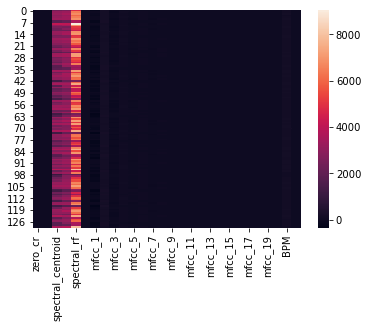

In [29]:
sns.heatmap(df_prog[nombres])

In [48]:
df[nombres].describe()

,zero_cr,zero_crossings_m,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,auto_c
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,6.700000,0.067000,3055.124976,3234.481476,6378.480991,0.490740,-130.546905,134.955927,-39.905790,47.183505,-10.968754,26.882398,-10.337420,15.597493,-3.984162,7.634342,-1.127645,5.225836,1.082828,0.786248,2.572196,-2.101176,1.605395,-2.745808,2.810527,-4.140072,122.338512,0.541948
std,5.954821,0.059548,759.071372,575.317565,1706.097140,0.083071,78.702976,22.846910,15.542400,12.403573,14.366110,9.420237,8.064488,7.575513,6.014610,7.191409,4.458062,4.332008,3.828912,4.214750,3.171275,3.257439,3.691446,3.050853,3.680361,3.001405,13.111045,0.112711
min,0.000000,0.000000,1048.112296,1714.480370,1996.470645,0.293667,-344.386047,79.576607,-82.701820,3.453289,-41.383003,-9.250646,-30.368473,-11.366961,-20.222498,-17.005257,-15.279900,-8.356874,-11.080114,-10.705889,-9.183908,-10.831484,-12.717571,-10.186462,-8.786132,-11.849880,89.102909,0.258043
25%,2.000000,0.020000,2589.772909,2878.523597,5198.921744,0.423949,-205.006046,119.688833,-49.529819,39.791071,-20.318860,21.153908,-15.418287,11.025396,-8.098277,2.304283,-3.883887,2.420640,-1.135472,-2.029877,0.906034,-4.281806,-0.855165,-4.504128,0.181110,-6.010302,114.843750,0.450547
50%,5.000000,0.050000,3053.528272,3242.542552,6404.796274,0.484832,-119.947140,134.249939,-41.007078,47.958807,-13.098847,28.465495,-10.942393,16.108432,-4.147644,8.295944,-1.148835,5.395957,1.057460,1.107861,2.802027,-2.109776,1.633349,-2.878624,2.715550,-4.234368,126.048018,0.531715
75%,9.000000,0.090000,3535.430422,3592.240162,7404.125435,0.555346,-58.283065,147.539600,-31.087374,54.905433,-4.513569,33.437392,-5.276504,21.237915,0.014774,13.245689,1.232100,8.046253,3.218458,3.624973,4.671540,-0.240749,4.244493,-0.997745,5.413307,-2.475971,129.199219,0.632114
max,38.000000,0.380000,5432.264188,4705.437737,10776.945332,0.720746,11.648904,212.757401,25.490688,80.919510,42.368832,63.110023,13.943148,34.909435,20.003878,24.447182,18.694393,19.026594,13.946415,20.156885,13.283858,9.132618,11.862654,7.678297,12.606647,7.841331,172.265625,0.873795


In [12]:
### Entrenamiento 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df.iloc[:390,[0]].values

In [15]:
y = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [69]:
a = ['1', '2', '3', '4', '5', '6']

'3'

In [68]:
a

['2', '4', '6']

In [49]:
a = 1+2j

In [50]:
type(a)

complex